# Reading the data and exploring it

In [1]:
%pylab inline
import pandas as pd

file_directory_project_2 = 'D:/0_Machine_Learning/Software -- ML Journey/books/1.ML_bookcamps/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df_2 = pd.read_csv(file_directory_project_2)
df_2.head()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df_2.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [3]:
df_2.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df_2['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [5]:
df_2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Data Cleaning and EDA

1. The column names are not consistent
2. dtypes need to be taken care of
3. Also in some columns' values there is space in between 
4. Also a lot of columns need to be encoded


1. Taking care of column  names

In [6]:
import re
new_columns = []
for one_col in df_2.columns:
    split = re.findall('[a-z]+|[A-Z][a-z]*', one_col)
    if len (split) > 1:
        final = split[0].capitalize() + '_' + ''.join(re.findall('[a-z]+|[A-Z][a-z]*', one_col)[1:])
        new_columns.append(final)
    else:
        final = split[0].capitalize()
        
        new_columns.append(final)
    #print (final)
new_columns

['Customer_ID',
 'Gender',
 'Senior_Citizen',
 'Partner',
 'Dependents',
 'Tenure',
 'Phone_Service',
 'Multiple_Lines',
 'Internet_Service',
 'Online_Security',
 'Online_Backup',
 'Device_Protection',
 'Tech_Support',
 'Streaming_TV',
 'Streaming_Movies',
 'Contract',
 'Paperless_Billing',
 'Payment_Method',
 'Monthly_Charges',
 'Total_Charges',
 'Churn']

In [7]:
df_2.columns = new_columns

In [8]:
df_2.head().T

,0,1,2,3,4
Customer_ID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
Gender,Female,Male,Male,Male,Female
Senior_Citizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
Tenure,1,34,2,45,2
Phone_Service,No,Yes,Yes,No,Yes
Multiple_Lines,No phone service,No,No,No phone service,No
Internet_Service,DSL,DSL,DSL,DSL,Fiber optic
Online_Security,No,Yes,Yes,Yes,No


2. taking care of dtypes

In [9]:
df_2.dtypes

Customer_ID           object
Gender                object
Senior_Citizen         int64
Partner               object
Dependents            object
Tenure                 int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn                 object
dtype: object

In [10]:
df_2['Total_Charges'] = df_2['Total_Charges'].str.replace(' ', '0').astype(float)

In [11]:
df_2.loc[df_2['Churn'] == 'No', 'Churn'] = 0
df_2.loc[df_2['Churn'] == 'Yes', 'Churn'] = 1
df_2['Churn'] = df_2['Churn'].astype(int)

# Shorter implementation ---> df_final['Churn'] = (df_final['Churn'] == 'Yes').astype(int)

In [12]:
df_2.dtypes

Customer_ID           object
Gender                object
Senior_Citizen         int64
Partner               object
Dependents            object
Tenure                 int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn                  int32
dtype: object

In [13]:
df_2['Churn'].value_counts(normalize = True)*100

0    73.463013
1    26.536987
Name: Churn, dtype: float64

In [14]:
# I do have an imbalanced datasets

3. taking care of spaces in some columns' values

In [15]:
for one_col in df_2.columns:
    
    if df_2[one_col].dtype == 'object':
        #print (one_col)
        df_2[one_col] = df_2[one_col].str.replace(' ', '_')

In [16]:
df_2.head().T

,0,1,2,3,4
Customer_ID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
Gender,Female,Male,Male,Male,Female
Senior_Citizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
Tenure,1,34,2,45,2
Phone_Service,No,Yes,Yes,No,Yes
Multiple_Lines,No_phone_service,No,No,No_phone_service,No
Internet_Service,DSL,DSL,DSL,DSL,Fiber_optic
Online_Security,No,Yes,Yes,Yes,No


In [17]:
df_2 = df_2.drop('Customer_ID', axis = 1)
df_2

,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,Female,0,Yes,No,1,No,No_phone_service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic_check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One_year,No,Mailed_check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
3,Male,0,No,No,45,No,No_phone_service,DSL,Yes,No,Yes,Yes,No,No,One_year,No,Bank_transfer_(automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One_year,Yes,Mailed_check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber_optic,No,Yes,Yes,No,Yes,Yes,One_year,Yes,Credit_card_(automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No_phone_service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic_check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed_check,74.40,306.60,1


In [18]:
numerical_columns = df_2[['Tenure', 'Monthly_Charges' ,'Total_Charges']]
categorical_columns = df_2.drop(['Tenure', 'Monthly_Charges' ,'Total_Charges', 'Churn'], axis = 1)

In [19]:
numerical_columns

,Tenure,Monthly_Charges,Total_Charges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [20]:
categorical_columns

,Gender,Senior_Citizen,Partner,Dependents,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method
0,Female,0,Yes,No,No,No_phone_service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic_check
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One_year,No,Mailed_check
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check
3,Male,0,No,No,No,No_phone_service,DSL,Yes,No,Yes,Yes,No,No,One_year,No,Bank_transfer_(automatic)
4,Female,0,No,No,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One_year,Yes,Mailed_check
7039,Female,0,Yes,Yes,Yes,Yes,Fiber_optic,No,Yes,Yes,No,Yes,Yes,One_year,Yes,Credit_card_(automatic)
7040,Female,0,Yes,Yes,No,No_phone_service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic_check
7041,Male,1,Yes,No,Yes,Yes,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed_check


### Point
feature importance analysis should be done ONLY on training data so I need to split data first into training, val, and test to make sure no knowledge can be leaked from test dataset



### feature importance analysis - categorical features -- Mutual Information


In [21]:
# This split is on the raw data and only for feature importance analysis to assure the feature importance is 
# done only on the training dataset, but for the modeling the split should be done on the preprocessed data 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score


X = pd.concat([categorical_columns, numerical_columns], axis = 1)
y = df_2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                    y_train, 
                                                    test_size=0.25, 
                                                    random_state=42)

mi_dic = {}
for one_cat_col in categorical_columns.columns:
    mi_dic[one_cat_col] = mutual_info_score (X_train[one_cat_col], y_train)

pd.DataFrame.from_dict(mi_dic, orient='index', columns=['MI']).sort_values('MI', ascending = False)

,MI
Contract,0.100157
Online_Security,0.060861
Tech_Support,0.060612
Internet_Service,0.050984
Online_Backup,0.046340
Device_Protection,0.043512
Payment_Method,0.040489
Streaming_TV,0.031582
Streaming_Movies,0.031242
Paperless_Billing,0.019712


###  feature importance analysis - numerical features -- (Pearson’s) correlation coefficient

In [ ]:
corelation_coef_dic = {}

for one_col in numerical_columns.columns:
    corelation_coef_dic[one_col] = X_train[one_col].corr(y_train)

pd.DataFrame.from_dict(corelation_coef_dic,  orient='index', columns=['CC']).sort_values(by = 'CC', ascending = False)

4. Encoding of the categorical columns' values

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(categorical_columns)

In [24]:
feature_names = encoder.get_feature_names_out(categorical_columns.columns)

In [25]:
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)
encoded_df.head()

,Gender_Female,Gender_Male,Senior_Citizen_0,Senior_Citizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone_Service_No,Phone_Service_Yes,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [26]:
dataset = pd.concat([numerical_columns, encoded_df, df_2['Churn']], axis = 1)
dataset.head().T

,0,1,2,3,4
Tenure,1.00,34.00,2.00,45.00,2.00
Monthly_Charges,29.85,56.95,53.85,42.30,70.70
Total_Charges,29.85,1889.50,108.15,1840.75,151.65
Gender_Female,1.00,0.00,0.00,0.00,1.00
Gender_Male,0.00,1.00,1.00,1.00,0.00
Senior_Citizen_0,1.00,1.00,1.00,1.00,1.00
Senior_Citizen_1,0.00,0.00,0.00,0.00,0.00
Partner_No,0.00,1.00,1.00,1.00,1.00
Partner_Yes,1.00,0.00,0.00,0.00,0.00
Dependents_No,1.00,1.00,1.00,1.00,1.00


### Training, making predictions on validation datasets, and estimating accuracy

In [27]:
from sklearn.model_selection import train_test_split

X = dataset.drop(['Churn'], axis = 1)
y = dataset['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                    y_train, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='liblinear')

model = lr_model.fit(X_train, y_train)
y_pred = model.predict(X_val)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [29]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_pred)

print('Accuracy: {:.2f}%'.format(accuracy * 100))


Accuracy: 79.84%


The predict method in scikit-learn does not have a parameter to specify the threshold for classification. The predict method simply returns the predicted class labels for the input data, based on the default threshold of 0.5 for binary classification (and argmax for multiclass classification).

If you want to adjust the classification threshold for your model, you will need to use the **predict_proba** method instead, which returns the predicted probabilities of each class. You can then apply your own threshold to these probabilities to make the final classification decision.

In [30]:
y_pred = model.predict_proba(X_val)#[:,1]
y_pred

array([[0.85263643, 0.14736357],
       [0.75468349, 0.24531651],
       [0.56826183, 0.43173817],
       ...,
       [0.28387408, 0.71612592],
       [0.93890763, 0.06109237],
       [0.96814817, 0.03185183]])

###  code to specify the threshold:

In [31]:
y_pred_soft = model.predict_proba(X_val)[:, 1]
threshold =0.5
y_pred_hard = (y_pred_soft > threshold).astype(int)
accuracy = (y_pred_hard == y_val).mean()
accuracy

0.7984386089425124

In [32]:
thresholds = np.arange(0.1, 1, 0.1)
accuracy_dict = {} 

for t in thresholds:
    y_pred_hard = (model.predict_proba(X_val)[:, 1] > t).astype(int)
    accuracy = (y_pred_hard == y_val).mean()
    accuracy_dict[t] = accuracy
    print(f"Threshold = {t:.2f} ----> Accuracy = {accuracy:.2f} %")


Threshold = 0.10 ----> Accuracy = 0.61 %
Threshold = 0.20 ----> Accuracy = 0.70 %
Threshold = 0.30 ----> Accuracy = 0.76 %
Threshold = 0.40 ----> Accuracy = 0.78 %
Threshold = 0.50 ----> Accuracy = 0.80 %
Threshold = 0.60 ----> Accuracy = 0.79 %
Threshold = 0.70 ----> Accuracy = 0.76 %
Threshold = 0.80 ----> Accuracy = 0.73 %
Threshold = 0.90 ----> Accuracy = 0.73 %


In [33]:
accuracy_dict

{0.1: 0.609652235628105,
 0.2: 0.7019162526614621,
 0.30000000000000004: 0.7551454932576295,
 0.4: 0.7828246983676366,
 0.5: 0.7984386089425124,
 0.6: 0.7856635911994322,
 0.7000000000000001: 0.7622427253371186,
 0.8: 0.7338537970191625,
 0.9: 0.7310149041873669}

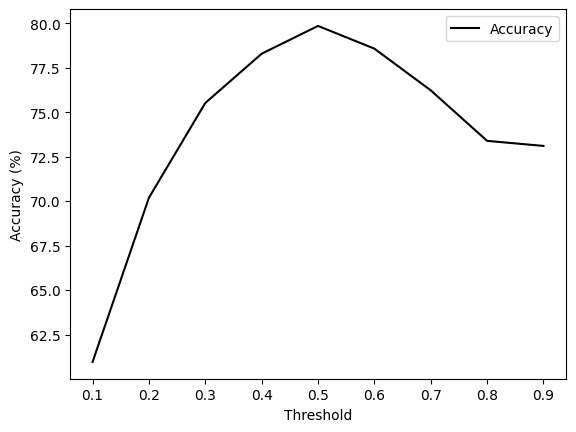

In [34]:
import matplotlib.pyplot as plt

df = pd.DataFrame.from_dict(accuracy_dict, orient='index', columns=['Accuracy']).apply(lambda x: x * 100)
ax = df.plot(kind='line', y='Accuracy', color='black')
#ax.set_title("Accuracy over Time")
ax.set_xlabel("Threshold")
ax.set_ylabel("Accuracy (%)")
plt.show()
fig = ax.get_figure()
fig.savefig('Accuracy_plot.png', dpi=300)

### Model parameters:

In [35]:
feature_names = list(X.columns)

bias_term = model.intercept_[0]
print (f"The bias term is equal to {bias_term}")

coef_abs = np.abs(model.coef_)

feature_importance = np.sum(coef_abs, axis=0)

feat_imp_dict = dict(zip(feature_names, feature_importance))

for feature, importance in sorted(feat_imp_dict.items(), key=lambda x: x[1], reverse=True):
    print(feature + ': {:.2f}'.format(importance))

The bias term is equal to -0.11084732586070499
Contract_Month-to-month: 0.56
Contract_Two_year: 0.49
Internet_Service_DSL: 0.29
Internet_Service_Fiber_optic: 0.28
Phone_Service_Yes: 0.24
Payment_Method_Electronic_check: 0.23
Online_Security_Yes: 0.23
Paperless_Billing_No: 0.22
Online_Security_No: 0.22
Multiple_Lines_No: 0.21
Tech_Support_Yes: 0.19
Tech_Support_No: 0.18
Contract_One_year: 0.18
Payment_Method_Credit_card_(automatic): 0.17
Gender_Male: 0.14
Streaming_Movies_No: 0.14
Phone_Service_No: 0.13
Multiple_Lines_No_phone_service: 0.13
Streaming_Movies_Yes: 0.13
Paperless_Billing_Yes: 0.11
Senior_Citizen_0: 0.11
Internet_Service_No: 0.10
Online_Security_No_internet_service: 0.10
Online_Backup_No_internet_service: 0.10
Device_Protection_No_internet_service: 0.10
Tech_Support_No_internet_service: 0.10
Streaming_TV_No_internet_service: 0.10
Streaming_Movies_No_internet_service: 0.10
Payment_Method_Bank_transfer_(automatic): 0.10
Online_Backup_Yes: 0.09
Online_Backup_No: 0.08
Partner_N

### Saving the model and encoder objects

In [36]:
import pickle

with open('model_and_encoder.pkl', 'wb') as f_out:
    pickle.dump({'encoder': encoder, 'model': model}, f_out)

In [37]:
# Load the objects from the file
with open('model_and_encoder.pkl', 'rb') as f:
    data = pickle.load(f)

# Get the encoder and model
encoder = data['encoder']
model = data['model']


### Making prediction on new data point



In [38]:
# I need the new data points columns to be exactly the same as the data used in the beggining to train 
# the model in terms of columns' names which is not the case and the new data point's columns are all in the lower case!
# I corrected the name of the features of the new customer to be consistent with the data used in the training, 
# also the values need to be consistent like 'no' should be changed to 'No'

customer = {
'customerID': '8879-zkjof',
'gender': 'Female',
'SeniorCitizen': '0',
'Partner': 'No',
'Dependents': 'No',
'tenure': 41,
'PhoneService': 'Yes',
'MultipleLines': 'No',
'InternetService': 'DSL',
'OnlineSecurity': 'Yes',
'OnlineBackup': 'No',
'DeviceProtection': 'Yes',
'TechSupport': 'Yes',
'StreamingTV': 'Yes',
'StreamingMovies': 'Yes',
'Contract': 'One year',
'PaperlessBilling': 'Yes',
'PaymentMethod': 'Bank transfer (automatic)',
'MonthlyCharges': 79.85,
'TotalCharges': 3320.75,
}

## To make a prediction on new data point

To assure than the new data point goes through the exactly same process as the training data, the following functions need to be executed


In [39]:
def dataframe_maker(dic_of_new_datapoint):
    df = pd.DataFrame.from_dict(dic_of_new_datapoint, orient='index').T
    if 'customerID' in df.columns:
        df = df.drop('customerID', axis = 1 )
    return df 


def column_name_corrector (df):
    import re
    new_columns = []
    for one_col in df.columns:
        split = re.findall('[a-z]+|[A-Z][a-z]*', one_col)
        if len (split) > 1:
            final = split[0].capitalize() + '_' + ''.join(re.findall('[a-z]+|[A-Z][a-z]*', one_col)[1:])
            new_columns.append(final)
        else:
            final = split[0].capitalize()

            new_columns.append(final)
        #print (final)
    return new_columns

def dtypes_corrector(df):
    numerical_columns_names = ['Senior_Citizen', 'Tenure', 'Monthly_Charges', 'Total_Charges']
    
    df[numerical_columns_names] = df[numerical_columns_names].astype(float)
    
    return #df.dtypes

def space_corrector(df):
    for one_col in df.columns:

        if df[one_col].dtype == 'object':
            #print (one_col)
            df[one_col] = df[one_col].str.replace(' ', '_')
            
    return #df

def data_encoder (df):
    with open('model_and_encoder.pkl', 'rb') as f:
        data = pickle.load(f)

    # Get the encoder 
    encoder = data['encoder']
    
    categorical_columns_names = ['Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method']
    #print (categorical_columns_names)
    
    feature_names = encoder.get_feature_names_out(categorical_columns_names)
    encoded_new_data = encoder.transform(df[categorical_columns_names])
    
    return feature_names, encoded_new_data

In [40]:
df_new_customer = dataframe_maker(customer)
df_new_customer.columns = column_name_corrector(df_new_customer)
df_new_customer

,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Female,0,No,No,41,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75


In [41]:
df_new_customer.dtypes

Gender               object
Senior_Citizen       object
Partner              object
Dependents           object
Tenure               object
Phone_Service        object
Multiple_Lines       object
Internet_Service     object
Online_Security      object
Online_Backup        object
Device_Protection    object
Tech_Support         object
Streaming_TV         object
Streaming_Movies     object
Contract             object
Paperless_Billing    object
Payment_Method       object
Monthly_Charges      object
Total_Charges        object
dtype: object

In [42]:
dtypes_corrector(df_new_customer)

In [43]:
space_corrector(df_new_customer)

In [44]:
df_new_customer

,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Female,0.0,No,No,41.0,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One_year,Yes,Bank_transfer_(automatic),79.85,3320.75


In [45]:
feature_names, encoded_new_data = data_encoder(df_new_customer)

In [46]:
numerical_columns_names = ['Tenure', 'Monthly_Charges', 'Total_Charges']
df_new_customer[numerical_columns_names]

,Tenure,Monthly_Charges,Total_Charges
0,41.0,79.85,3320.75


In [47]:
customer_data_final = pd.concat([df_new_customer[numerical_columns_names], pd.DataFrame(encoded_new_data, columns=feature_names)], axis = 1)

In [48]:
customer_data_final

,Tenure,Monthly_Charges,Total_Charges,Gender_Female,Gender_Male,Senior_Citizen_0,Senior_Citizen_1,Partner_No,Partner_Yes,Dependents_No,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,41.0,79.85,3320.75,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [49]:
model.predict_proba(customer_data_final)

array([[0.93227875, 0.06772125]])

In [50]:
model.predict_proba(customer_data_final)[0, 1]

0.06772124985073208

In [51]:
customer_2 = {
'gender': 'Female',
'SeniorCitizen': '1',
'Partner': 'No',
'Dependents': 'No',
'PhoneService': 'Yes',
'MultipleLines': 'Yes',
'InternetService': 'Fiber optic',
'OnlineSecurity': 'No',
'OnlineBackup': 'No',
'DeviceProtection': 'No',
'TechSupport': 'No',
'StreamingTV': 'Yes',
'StreamingMovies': 'No',
'Contract': 'Month-to-month',
'PaperlessBilling': 'Yes',
'PaymentMethod': 'Electronic check',
'tenure': 1,
'MonthlyCharges': 85.7,
'TotalCharges': 85.7
}


In [52]:
df_new_customer = dataframe_maker(customer_2)
df_new_customer.columns = column_name_corrector(df_new_customer)
dtypes_corrector(df_new_customer)
space_corrector(df_new_customer)
feature_names, encoded_new_data = data_encoder(df_new_customer)
customer_data_final = pd.concat([df_new_customer[numerical_columns_names], pd.DataFrame(encoded_new_data, columns=feature_names)], axis = 1)
model.predict_proba(customer_data_final)

array([[0.20599114, 0.79400886]])

### Evaluation metrics for classification

#### ACCURACY

In [135]:
thresholds = np.round(np.linspace(0, 1, 11), 1)

for t in thresholds:
    y_pred_soft = model.predict_proba(X_val)[:, 1]
    y_pred_hard = (y_pred_soft > t)
    accuracy = (y_pred_hard == y_val).mean() * 100
    print (f"Threshold = {t:.2f} ---> accuracy = {accuracy:.2f} %")

Threshold = 0.00 ---> accuracy = 26.90 %
Threshold = 0.10 ---> accuracy = 60.97 %
Threshold = 0.20 ---> accuracy = 70.19 %
Threshold = 0.30 ---> accuracy = 75.51 %
Threshold = 0.40 ---> accuracy = 78.28 %
Threshold = 0.50 ---> accuracy = 79.84 %
Threshold = 0.60 ---> accuracy = 78.57 %
Threshold = 0.70 ---> accuracy = 76.22 %
Threshold = 0.80 ---> accuracy = 73.39 %
Threshold = 0.90 ---> accuracy = 73.10 %
Threshold = 1.00 ---> accuracy = 73.10 %


#### IMBALANCED DATASET

In [128]:
dataset['Churn'].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: Churn, dtype: float64

#### DUMMY BASELINE MODEL

In [145]:
dummy_model = np.zeros((y_val.shape))
dummy_model

array([0., 0., 0., ..., 0., 0., 0.])

In [154]:
print(f"The dummy model which always predict the majority class has accuracy of {(dummy_model == y_val).mean()*100 :.2f} %")

The dummy model which always predict the majority class has accuracy of 73.10 %


#### CONFUSION TABLE

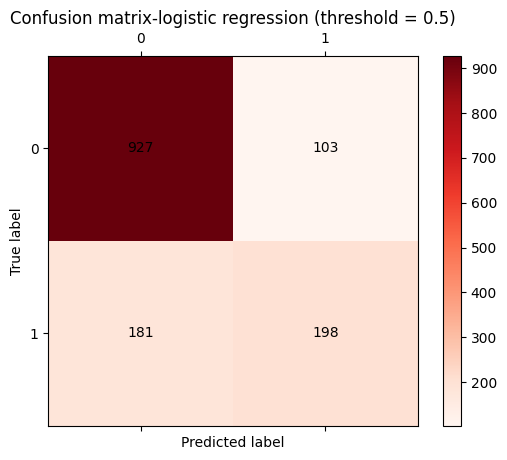

In [202]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_val) # as discussed .predict method assumption is: threshold = 0.5
conf_matrix = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix with counts
fig, ax = plt.subplots()
im = ax.matshow(conf_matrix, cmap='Reds')
plt.colorbar(im)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, str(conf_matrix[i, j]), va='center', ha='center')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix-logistic regression (threshold = 0.5)')
plt.show()


In [204]:
# building confusion table on my own
t = 0.5
y_pred_soft = model.predict_proba(X_val)[:, 1]
my_df = pd.DataFrame({'ground_truth': y_val, 'prediction': (y_pred_soft>t).astype(int)}).reset_index(drop = True)
true_positive  = my_df.loc[((my_df['ground_truth'] == 1) & (my_df['prediction'] == 1)), 'ground_truth'].count()
false_positive = my_df.loc[((my_df['ground_truth'] == 0) & (my_df['prediction'] == 1)), 'ground_truth'].count()

true_negative   = my_df.loc[((my_df['ground_truth'] == 0) & (my_df['prediction'] == 0)), 'ground_truth'].count()
false_negative  = my_df.loc[((my_df['ground_truth'] == 1) & (my_df['prediction'] == 0)), 'ground_truth'].count()

print (f"True positive = {true_positive}")
print (f"False positive = {false_positive}")
print (f"True negative = {true_negative}")
print (f"False negative = {false_negative}")

True positive = 198
False positive = 103
True negative = 927
False negative = 181


#### PRECISION AND RECALL

In [201]:
# Calculating precision on my own 

precision = true_positive / (true_positive + false_positive)
precision

0.6578073089700996

In [311]:
from sklearn.metrics import precision_score, recall_score
t = 0.5
y_pred = model.predict_proba(X_val)[:, 1] > t

precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

# Print precision
print ("For threshold = 0.5:")
print("Precision: ", precision)
print("Recall: ", recall)

For threshold = 0.5:
Precision:  0.6578073089700996
Recall:  0.5224274406332454


In [210]:
# For various thresholds:

In [258]:
thresholds = np.round(np.linspace(0, 1, 11), 1)

conf_matrix_dic = {}
for t in thresholds:
    y_pred_soft = model.predict_proba(X_val)[:, 1]
    y_pred_hard = (y_pred_soft > t).astype(int)
    #print (y_pred_hard)
    conf_matrix = confusion_matrix(y_val, y_pred_hard)
    conf_matrix_dic[t] = conf_matrix
conf_matrix_dic

{0.0: array([[   0, 1030],
        [   0,  379]], dtype=int64),
 0.1: array([[501, 529],
        [ 21, 358]], dtype=int64),
 0.2: array([[667, 363],
        [ 57, 322]], dtype=int64),
 0.3: array([[783, 247],
        [ 98, 281]], dtype=int64),
 0.4: array([[858, 172],
        [134, 245]], dtype=int64),
 0.5: array([[927, 103],
        [181, 198]], dtype=int64),
 0.6: array([[969,  61],
        [241, 138]], dtype=int64),
 0.7: array([[1013,   17],
        [ 318,   61]], dtype=int64),
 0.8: array([[1030,    0],
        [ 375,    4]], dtype=int64),
 0.9: array([[1030,    0],
        [ 379,    0]], dtype=int64),
 1.0: array([[1030,    0],
        [ 379,    0]], dtype=int64)}

In [259]:
conf_mat_df = pd.DataFrame.from_dict({k: {'Threshold': k,
                                 'TN': v[0, 0],
                                 'TP': v[1, 1],
                                 'FP': v[0, 1],
                                 'FN': v[1, 0]} for k, v in conf_matrix_dic.items()}, orient='index')
conf_mat_df

,Threshold,TN,TP,FP,FN
0.0,0.0,0,379,1030,0
0.1,0.1,501,358,529,21
0.2,0.2,667,322,363,57
0.3,0.3,783,281,247,98
0.4,0.4,858,245,172,134
0.5,0.5,927,198,103,181
0.6,0.6,969,138,61,241
0.7,0.7,1013,61,17,318
0.8,0.8,1030,4,0,375
0.9,0.9,1030,0,0,379


In [260]:
conf_mat_df['TPR'] = conf_mat_df['TP']  / (conf_mat_df['TP']  + conf_mat_df['FN'] )
conf_mat_df['FPR'] = conf_mat_df['FP']  / (conf_mat_df['FP']  + conf_mat_df['TN'] )
conf_mat_df

,Threshold,TN,TP,FP,FN,TPR,FPR
0.0,0.0,0,379,1030,0,1.000000,1.000000
0.1,0.1,501,358,529,21,0.944591,0.513592
0.2,0.2,667,322,363,57,0.849604,0.352427
0.3,0.3,783,281,247,98,0.741425,0.239806
0.4,0.4,858,245,172,134,0.646438,0.166990
0.5,0.5,927,198,103,181,0.522427,0.100000
0.6,0.6,969,138,61,241,0.364116,0.059223
0.7,0.7,1013,61,17,318,0.160950,0.016505
0.8,0.8,1030,4,0,375,0.010554,0.000000
0.9,0.9,1030,0,0,379,0.000000,0.000000


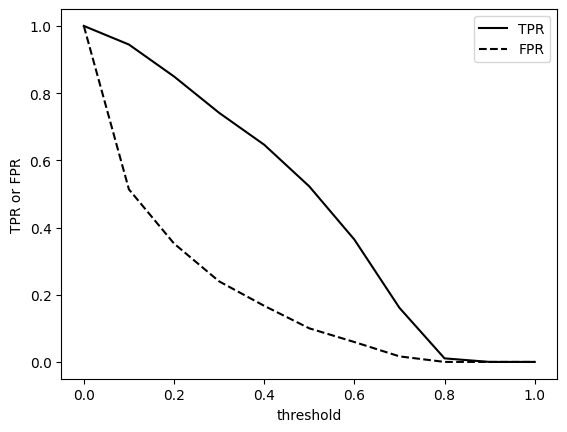

In [261]:
plt.plot(conf_mat_df['Threshold'], conf_mat_df['TPR'], label = 'TPR', color = 'black')
plt.plot(conf_mat_df['Threshold'], conf_mat_df['FPR'], label = 'FPR', color = 'black', linestyle='--')
plt.xlabel('threshold')
plt.ylabel('TPR or FPR')


plt.legend()
plt.show()

### Random model

In [294]:
np.random.seed(1)

y_random_model = np.random.uniform(0, 1, size = len(y_val))

In [295]:
thresholds = np.round(np.linspace(0, 1, 11), 1)

conf_mat_df_random_model = {}
for t in thresholds:
    y_pred_hard = (y_random_model > t).astype(int)
    #print (y_pred_hard)
    conf_matrix = confusion_matrix(y_val, y_pred_hard)
    conf_mat_df_random_model[t] = conf_matrix
conf_mat_df_random_model

{0.0: array([[   0, 1030],
        [   0,  379]], dtype=int64),
 0.1: array([[ 96, 934],
        [ 43, 336]], dtype=int64),
 0.2: array([[202, 828],
        [ 78, 301]], dtype=int64),
 0.3: array([[293, 737],
        [116, 263]], dtype=int64),
 0.4: array([[388, 642],
        [160, 219]], dtype=int64),
 0.5: array([[495, 535],
        [194, 185]], dtype=int64),
 0.6: array([[608, 422],
        [231, 148]], dtype=int64),
 0.7: array([[708, 322],
        [278, 101]], dtype=int64),
 0.8: array([[807, 223],
        [318,  61]], dtype=int64),
 0.9: array([[919, 111],
        [349,  30]], dtype=int64),
 1.0: array([[1030,    0],
        [ 379,    0]], dtype=int64)}

In [296]:
conf_mat_df_random_model = pd.DataFrame.from_dict({k: {'Threshold': k,
                                 'TN': v[0, 0],
                                 'TP': v[1, 1],
                                 'FP': v[0, 1],
                                 'FN': v[1, 0]} for k, v in conf_mat_df_random_model.items()}, orient='index')
conf_mat_df_random_model

,Threshold,TN,TP,FP,FN
0.0,0.0,0,379,1030,0
0.1,0.1,96,336,934,43
0.2,0.2,202,301,828,78
0.3,0.3,293,263,737,116
0.4,0.4,388,219,642,160
0.5,0.5,495,185,535,194
0.6,0.6,608,148,422,231
0.7,0.7,708,101,322,278
0.8,0.8,807,61,223,318
0.9,0.9,919,30,111,349


In [297]:
conf_mat_df_random_model['TPR'] = conf_mat_df_random_model['TP']  / (conf_mat_df_random_model['TP']  + conf_mat_df_random_model['FN'] )
conf_mat_df_random_model['FPR'] = conf_mat_df_random_model['FP']  / (conf_mat_df_random_model['FP']  + conf_mat_df_random_model['TN'] )
conf_mat_df_random_model

,Threshold,TN,TP,FP,FN,TPR,FPR
0.0,0.0,0,379,1030,0,1.000000,1.000000
0.1,0.1,96,336,934,43,0.886544,0.906796
0.2,0.2,202,301,828,78,0.794195,0.803883
0.3,0.3,293,263,737,116,0.693931,0.715534
0.4,0.4,388,219,642,160,0.577836,0.623301
0.5,0.5,495,185,535,194,0.488127,0.519417
0.6,0.6,608,148,422,231,0.390501,0.409709
0.7,0.7,708,101,322,278,0.266491,0.312621
0.8,0.8,807,61,223,318,0.160950,0.216505
0.9,0.9,919,30,111,349,0.079156,0.107767


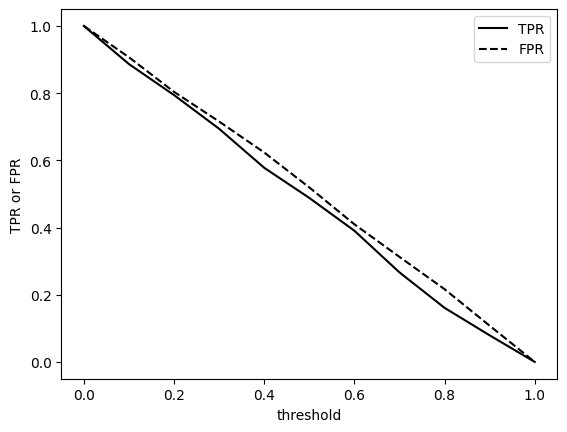

In [298]:
plt.plot(conf_mat_df_random_model['Threshold'], conf_mat_df_random_model['TPR'], label = 'TPR', color = 'black')
plt.plot(conf_mat_df_random_model['Threshold'], conf_mat_df_random_model['FPR'], label = 'FPR', color = 'black', linestyle='--')
plt.xlabel('threshold')
plt.ylabel('TPR or FPR')


plt.legend()
plt.show()

### Ideal Model

In [289]:
num_neg = y_val[(y_val == 0)].count()
num_pos = y_val[(y_val == 1)].count()
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_pred_ideal = np.linspace(0, 1, num_neg + num_pos)

In [290]:
thresholds = np.round(np.linspace(0, 1, 11), 1)

conf_mat_df_ideal_model = {}
for t in thresholds:
    y_pred_hard = (y_pred_ideal > t).astype(int)
    #print (y_pred_hard)
    conf_matrix = confusion_matrix(y_ideal, y_pred_hard)
    conf_mat_df_ideal_model[t] = conf_matrix
conf_mat_df_ideal_model

{0.0: array([[   1, 1029],
        [   0,  379]], dtype=int64),
 0.1: array([[141, 889],
        [  0, 379]], dtype=int64),
 0.2: array([[282, 748],
        [  0, 379]], dtype=int64),
 0.3: array([[423, 607],
        [  0, 379]], dtype=int64),
 0.4: array([[564, 466],
        [  0, 379]], dtype=int64),
 0.5: array([[705, 325],
        [  0, 379]], dtype=int64),
 0.6: array([[845, 185],
        [  0, 379]], dtype=int64),
 0.7: array([[986,  44],
        [  0, 379]], dtype=int64),
 0.8: array([[1030,    0],
        [  97,  282]], dtype=int64),
 0.9: array([[1030,    0],
        [ 238,  141]], dtype=int64),
 1.0: array([[1030,    0],
        [ 379,    0]], dtype=int64)}

In [299]:
conf_mat_df_ideal_model = pd.DataFrame.from_dict({k: {'Threshold': k,
                                 'TN': v[0, 0],
                                 'TP': v[1, 1],
                                 'FP': v[0, 1],
                                 'FN': v[1, 0]} for k, v in conf_mat_df_ideal_model.items()}, orient='index')
conf_mat_df_ideal_model

,Threshold,TN,TP,FP,FN
0.0,0.0,1,379,1029,0
0.1,0.1,141,379,889,0
0.2,0.2,282,379,748,0
0.3,0.3,423,379,607,0
0.4,0.4,564,379,466,0
0.5,0.5,705,379,325,0
0.6,0.6,845,379,185,0
0.7,0.7,986,379,44,0
0.8,0.8,1030,282,0,97
0.9,0.9,1030,141,0,238


In [300]:
conf_mat_df_ideal_model['TPR'] = conf_mat_df_ideal_model['TP']  / (conf_mat_df_ideal_model['TP']  + conf_mat_df_ideal_model['FN'] )
conf_mat_df_ideal_model['FPR'] = conf_mat_df_ideal_model['FP']  / (conf_mat_df_ideal_model['FP']  + conf_mat_df_ideal_model['TN'] )
conf_mat_df_ideal_model

,Threshold,TN,TP,FP,FN,TPR,FPR
0.0,0.0,1,379,1029,0,1.000000,0.999029
0.1,0.1,141,379,889,0,1.000000,0.863107
0.2,0.2,282,379,748,0,1.000000,0.726214
0.3,0.3,423,379,607,0,1.000000,0.589320
0.4,0.4,564,379,466,0,1.000000,0.452427
0.5,0.5,705,379,325,0,1.000000,0.315534
0.6,0.6,845,379,185,0,1.000000,0.179612
0.7,0.7,986,379,44,0,1.000000,0.042718
0.8,0.8,1030,282,0,97,0.744063,0.000000
0.9,0.9,1030,141,0,238,0.372032,0.000000


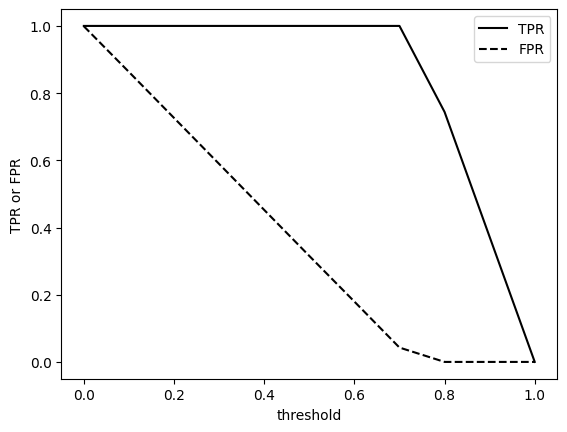

In [302]:
plt.plot(conf_mat_df_ideal_model['Threshold'], conf_mat_df_ideal_model['TPR'], label = 'TPR', color = 'black')
plt.plot(conf_mat_df_ideal_model['Threshold'], conf_mat_df_ideal_model['FPR'], label = 'FPR', color = 'black', linestyle='--')
plt.xlabel('threshold')
plt.ylabel('TPR or FPR')


plt.legend()
plt.show()

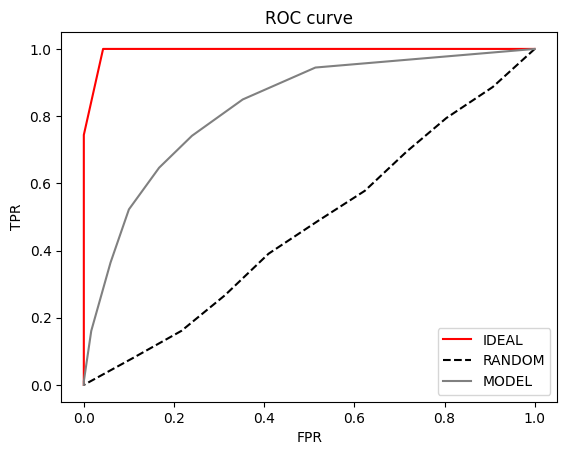

In [305]:
plt.plot(conf_mat_df_ideal_model['FPR'], conf_mat_df_ideal_model['TPR'], label = 'IDEAL', color = 'RED')
plt.plot(conf_mat_df_random_model['FPR'], conf_mat_df_random_model['TPR'], label = 'RANDOM', color = 'black', linestyle='--')
plt.plot(conf_mat_df['FPR'], conf_mat_df['TPR'], label = 'MODEL', color = 'GRAY')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend()
plt.show()

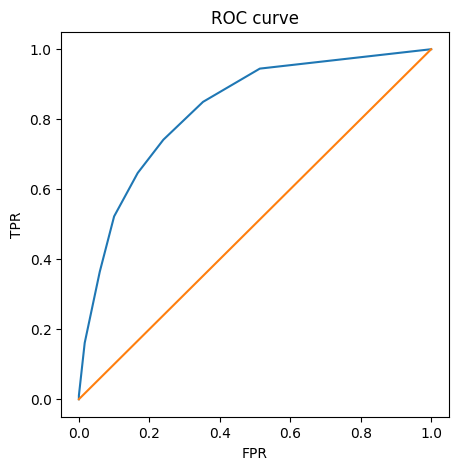

In [314]:
# We don't need to calculate random model ROC

plt.figure(figsize=(5, 5))
plt.plot(conf_mat_df.FPR, conf_mat_df.TPR)
plt.plot([0, 1], [0, 1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
plt.show()

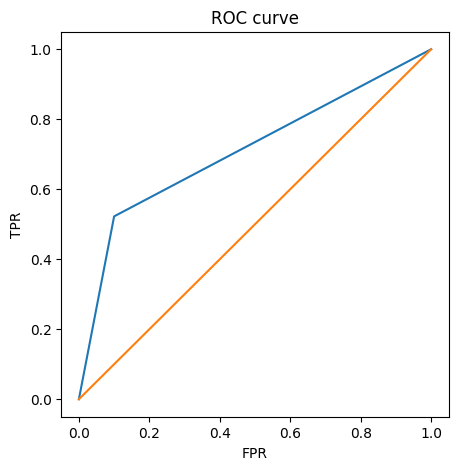

In [325]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
plt.show()

In [333]:
from sklearn.metrics import auc
print (f"The area under the curve of the model is {auc(conf_mat_df.FPR, conf_mat_df.TPR):.4f}")
print (f"The area under the curve of the random model is {auc(conf_mat_df_random_model.FPR, conf_mat_df_random_model.TPR):.4f}")
print (f"The area under the curve of the ideal model is {auc(conf_mat_df_ideal_model.FPR, conf_mat_df_ideal_model.TPR):.4f}")

The area under the curve of the model is 0.8275
The area under the curve of the random model is 0.4721
The area under the curve of the ideal model is 0.9936


In [328]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

0.7112137203166228

### Parameter tunning